In [1]:
!pip install numpy
import numpy as np
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Objectives:
- Is it worth to invest and withdraw profits ?
- Analyzing Ethereum available data (through dates 11/07/2023 - 09/30/2023)

## Content 
[Trend Analysis: Studying how the price of Ethereum changes over time.](#Trend-Analysis:-Studying-how-the-price-of-Ethereum-changes-over-time)

- Plotting Ethereum Mean Opening Price by Month 11/2017 - 09/2023
- Comparing Ethereum Mean Open Price Over Different Years (Overlap)

[Volatility Analysis: Examining how much the price fluctuates from high to low in a day.](#Volatility-Analysis:-Examining-how-much-the-price-fluctuates-from-high-to-low-in-a-day.)

- Plotting mean Open monthly value differences through years

[Volume Analysis: Understanding the trading activity and its relation to price movements.](#Volume-Analysis:-Understanding-the-trading-activity-and-its-relation-to-price-movements.)

- Plotting cumulative Ethereum Trading Volume by Month through years
- Comparing Ethereum Q1 - Q4 Trading Volume Sum "2020-2022"
- Comparing Ethereum Q1 - Q3 Trading Volume Sum "2020-2023"

[Correlation Analysis: Investigating potential relationships between Ethereum's price and other variables or external factors.](#Correlation-Analysis:-Investigating-potential-relationships-between-Ethereum's-price-and-other-variables-or-external-factors.)

- Computing correlation coefficient for Ethereum Volume with Ethereum Monthly Open Price Differences
- Computing correlation coefficient for Ethereum Volume with Ethereum Open Price
- Computing correlation coefficient for Ethereum Open Mean Price with Gasoline Price
- Computing correlation coefficient for Ethereum Open with COVID new cases
- Computing correlation coefficient for Ethereum Open Monthly Differences with COVID sum new cases
- Computing correlation coefficient for Ethereum Volume with COVID new cases
   cases


Predictive Modeling: Using historical data to create models predicting future price movements.



# Ethereum 

##### Source: https://finance.yahoo.com/quote/ETH-USD/history?period1=1510099200&period2=1695859200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true, october 5 2023


#### About the data set:

Columns/Indicators:
- Date: The date of the data entry.
- Open: The opening price of Ethereum on that date.
- High: The highest price of Ethereum reached during the day.
- Low: The lowest price of Ethereum reached during the day.
- Close: The closing price of Ethereum on that date.
- Adj Close: The adjusted closing price, which accounts for events like dividends, stock splits, etc., giving a more accurate reflection of the stock's value.
- Volume: The trading volume, indicating how many shares were traded on that day.


### Exploratory Data Analysis

In [2]:
#Relating with the df
ethereum = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\ETH-USD.csv')
ethereum.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [3]:
#Quality of data; ensuring there is no empty data or weird outliers
ethereum.isna().sum()
ethereum.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2.150000e+03
mean,1205.964542,1241.298281,1166.439461,1206.389989,1206.389989,1.216169e+10
std,1130.713919,1163.658466,1092.933844,1130.167952,1130.167952,1.032142e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,226.701638,231.523765,221.015122,226.755165,226.755165,4.611124e+09
50%,755.382995,786.794220,722.210938,756.900482,756.900482,9.394469e+09
75%,1834.667664,1866.320160,1799.701843,1834.583557,1834.583557,1.682551e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


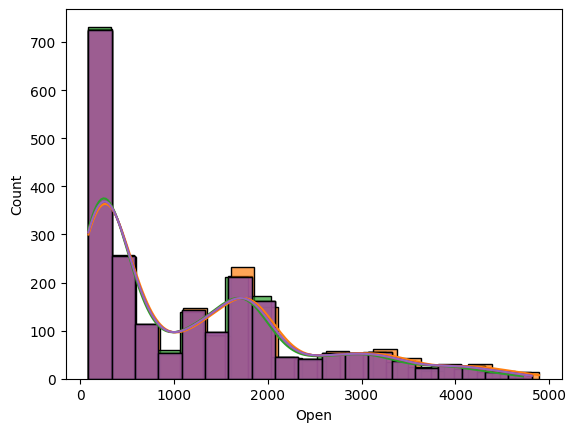

In [4]:
#Visualizing the described data
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    sns.histplot(ethereum[column], kde=True, label=column, alpha=0.7)

plt.show()

##### Preparing data for plotting

In [5]:
#Renaming columns and assigning correct dtype
ethereum.rename(columns={'Volume':'e_volume', 'Open':'e_open'}, inplace=True)
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
#Resampling by month and mean e_open
e_open_monthly = ethereum.resample('M', on='Date')['e_open'].mean()
#Eliminating day number from date
e_open_monthly.index = e_open_monthly.index.strftime('%Y-%m')

e_open_monthly.head()

Date
2017-11     373.696317
2017-12     630.583997
2018-01    1093.099893
2018-02     882.527006
2018-03     640.787129
Name: e_open, dtype: float64

# Trend Analysis: Studying how the price of Ethereum changes over time

### Plotting Ethereum Mean Opening Price by Month 11/2017 - 09/2023

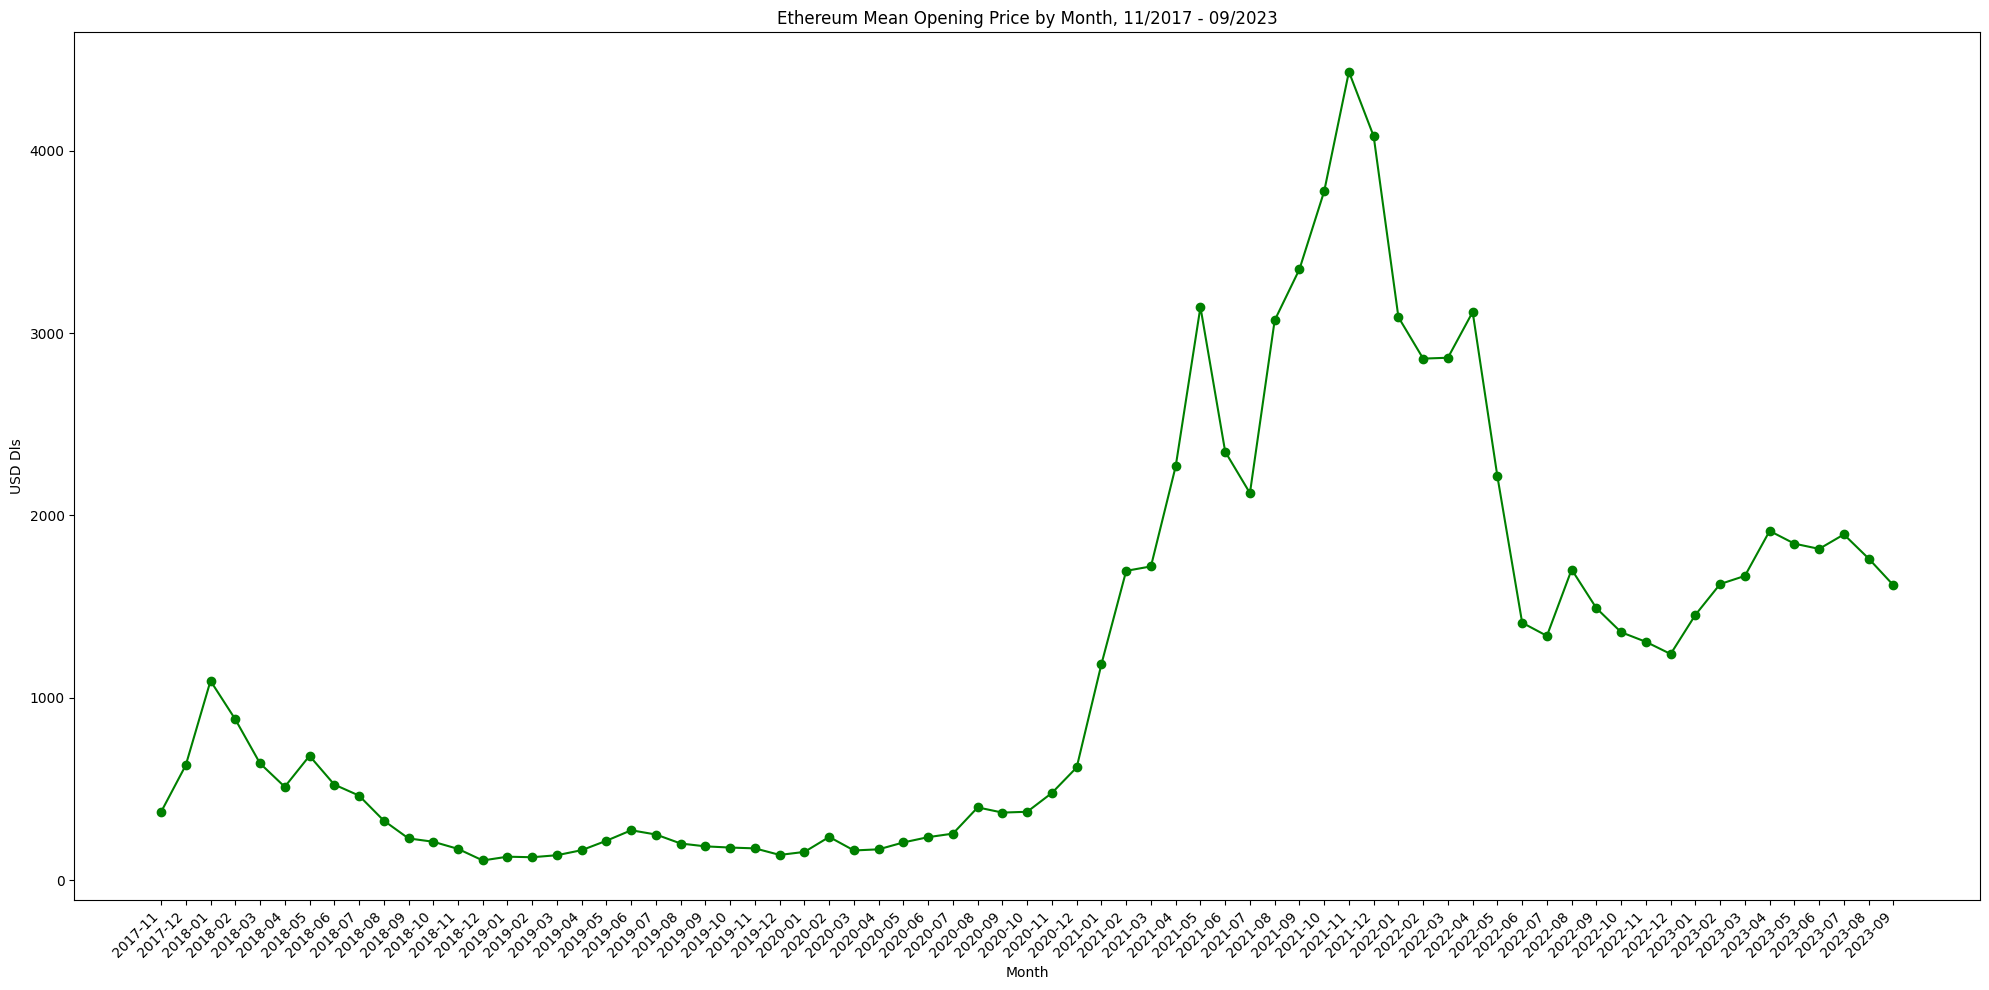

In [6]:
#Visualizing df through dates
plt.figure(figsize=(20, 10))
plt.plot(e_open_monthly.index, e_open_monthly.values, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Ethereum Mean Opening Price by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Volatility Analysis: Examining how much the price fluctuates from high to low in a day.

### Plotting mean Open monthly differences through years 

In [7]:
#Preparing data for plotting USD Dld differences by months
ethereum_monthly_diff = pd.DataFrame(e_open_monthly)
ethereum_monthly_diff['e_month_diff'] = ethereum_monthly_diff['e_open'].diff()
ethereum_monthly_diff['e_open'] = pd.to_numeric(ethereum_monthly_diff['e_open'], errors='coerce').fillna(0)
ethereum_monthly_diff['e_month_diff'] = pd.to_numeric(ethereum_monthly_diff['e_month_diff'], errors='coerce').fillna(0)
ethereum_monthly_diff= ethereum_monthly_diff.reset_index()
ethereum_monthly_diff= ethereum_monthly_diff[['Date','e_month_diff']]

print(ethereum_monthly_diff.head(10))


      Date  e_month_diff
0  2017-11      0.000000
1  2017-12    256.887680
2  2018-01    462.515896
3  2018-02   -210.572887
4  2018-03   -241.739877
5  2018-04   -128.638196
6  2018-05    169.897196
7  2018-06   -157.454161
8  2018-07    -60.545454
9  2018-08   -136.977291


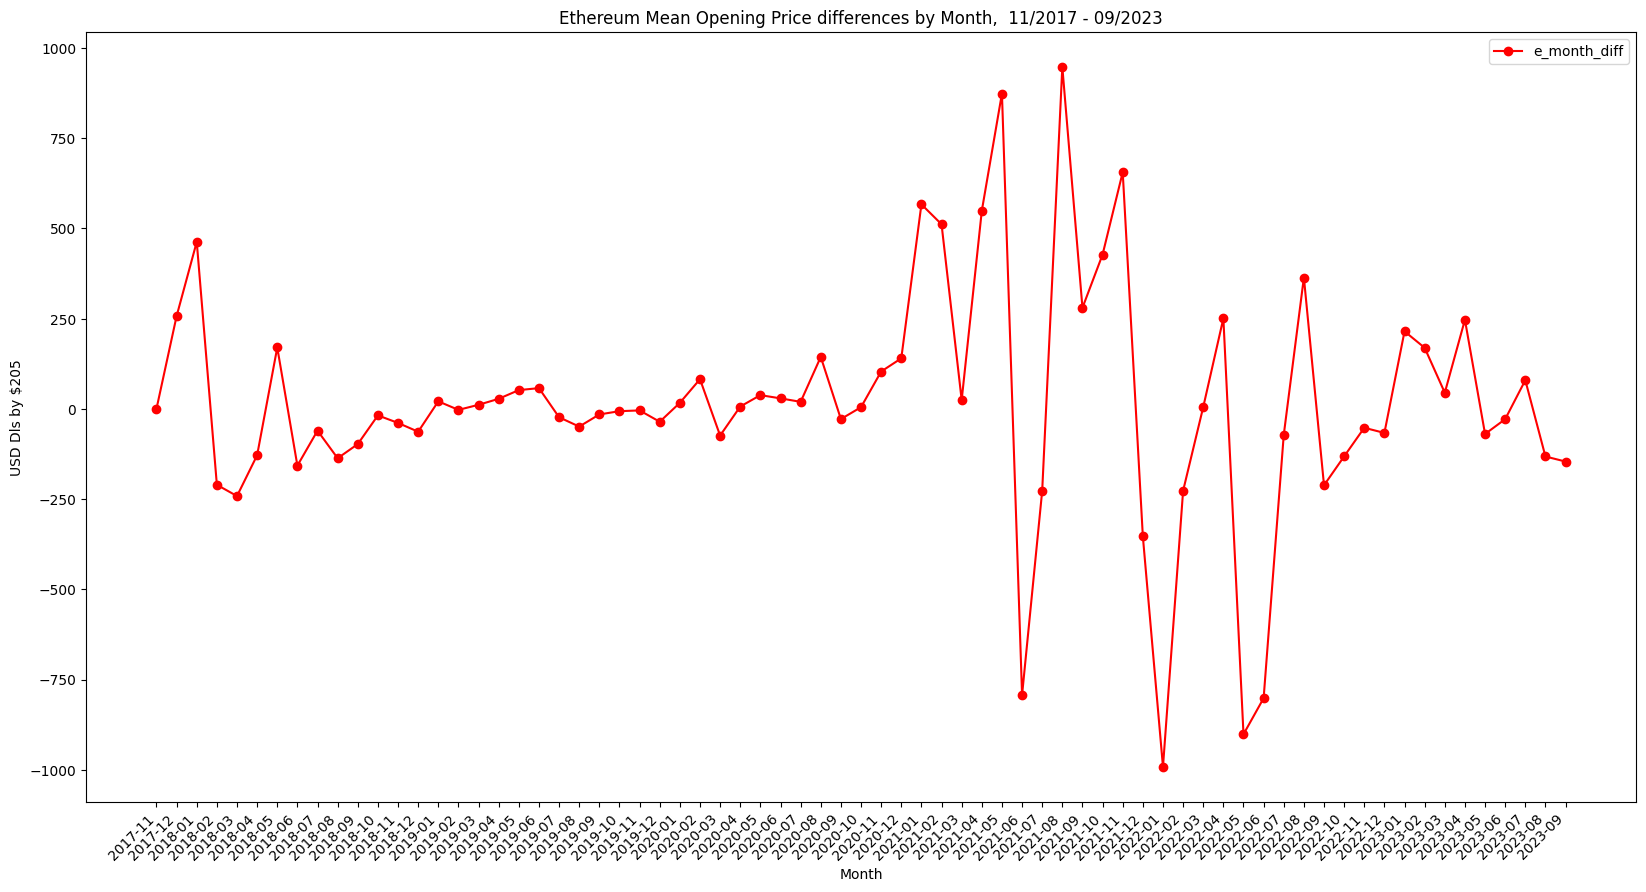

In [8]:
#Plotting
ax= ethereum_monthly_diff.plot(kind='line',x='Date', y='e_month_diff', marker='o', xlabel='Month', ylabel='USD Dls by $205', color='red', 
                               title='Ethereum Mean Opening Price differences by Month,  11/2017 - 09/2023')
plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(ethereum_monthly_diff['Date'])))
ax.set_xticklabels(ethereum_monthly_diff['Date'], rotation=45, ha='right')
plt.show()

## Volume Analysis: Understanding the trading activity and its relation to price movements.

### Plotting Ethereum cumulative Trading Monthly Volume through years

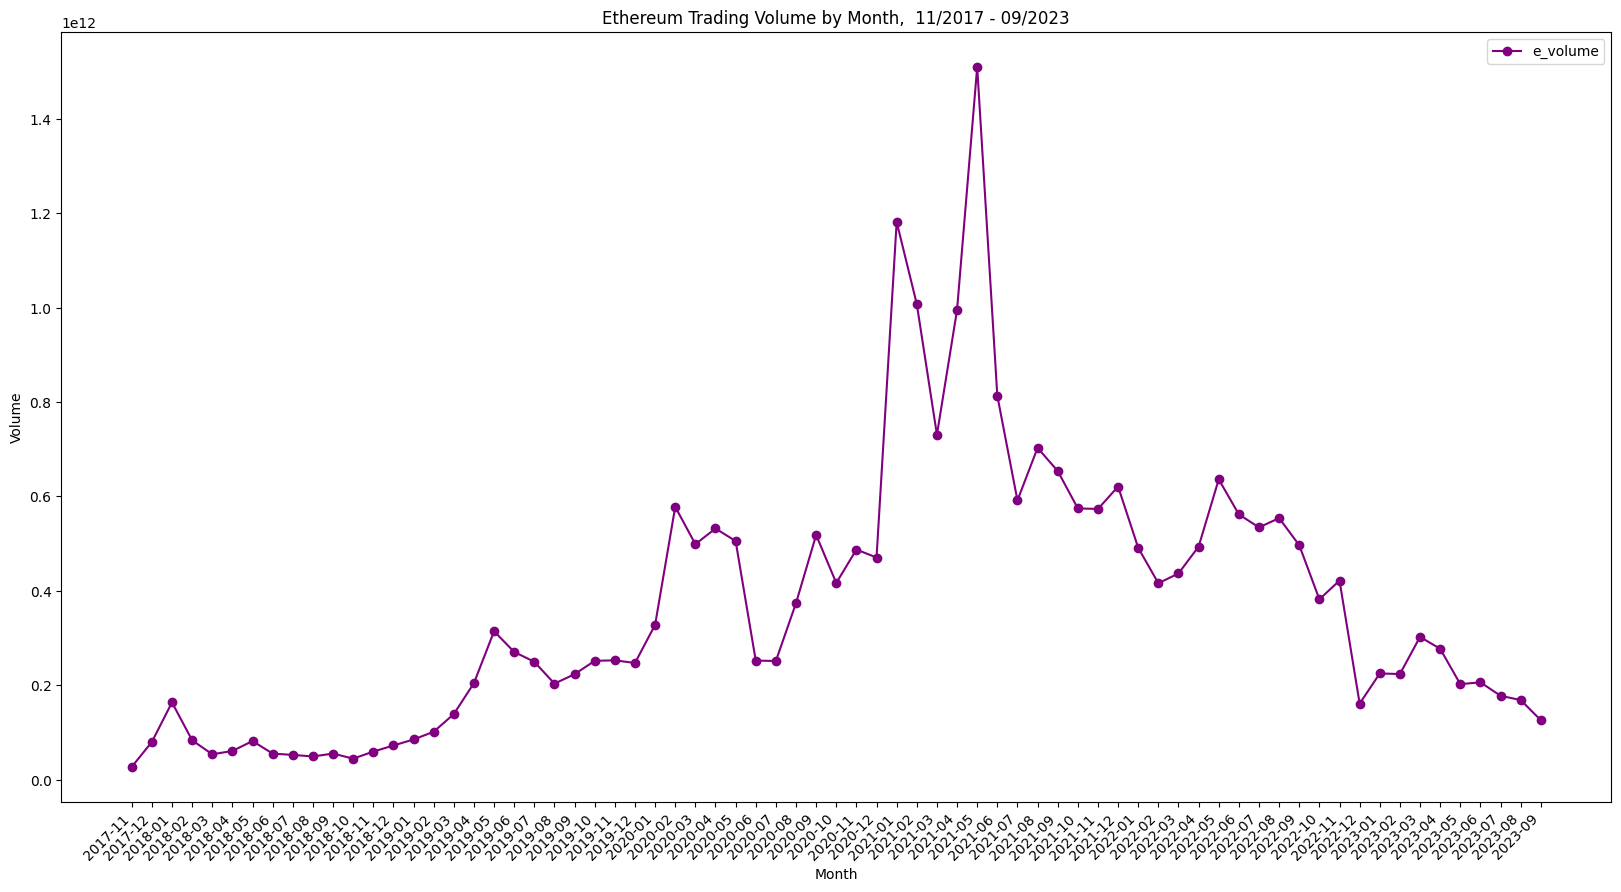

In [9]:
ethereum['Date'] = pd.to_datetime(ethereum['Date'])

e_volume_monthly = ethereum.resample('M', on='Date')['e_volume'].sum()
ethereum = ethereum[(ethereum['Date'] >= '2020-01') & (ethereum['Date'] < '2023-10')]

e_volume_monthly.index = e_volume_monthly.index.strftime('%Y-%m')
e_volume_monthly= e_volume_monthly.reset_index()

e_plotvolume = e_volume_monthly.plot(kind='line',x='Date', y='e_volume', marker='o', xlabel='Month', ylabel='Volume', color='purple', 
                               title='Ethereum Trading Volume by Month,  11/2017 - 09/2023')
plt.gcf().set_size_inches(20, 10)
e_plotvolume.set_xticks(range(len(e_volume_monthly['Date'])))
e_plotvolume.set_xticklabels(e_volume_monthly['Date'], rotation=45, ha='right')


plt.show()

# Gasoline Price

###### Source: U.S. Energy Information Administration, US Regular All Formulations Gas Price [GASREGW], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GASREGW, October 5, 2023. 

###### About: Weighted average based on sampling of approximately 900 retail outlets, 8:00AM Monday. The price represents self-service unless only full-service is available and includes all taxes. See (http://www.eia.doe.gov/oil_gas/petroleum/data_publications/wrgp/mogas_home_page.html) for further definitions. Regular Gasoline has an antiknock index (average of the research octane rating and the motor octane number) greater than or equal to 85 and less than 88. Octane requirements may vary by altitude.

DataSet: GASREGW (Gas Regular Weekly)

Columns:

Units: Dollars per Gallon, Not Seasonally Adjusted

Frequency: Weekly, Ending Monday 

### Exploratory Data Analysis

In [10]:
gas_price = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\GASREGW.csv')


gas_price.head(10)

,DATE,GASREGW
0,1990-08-20,1.191
1,1990-08-27,1.245
2,1990-09-03,1.242
3,1990-09-10,1.252
4,1990-09-17,1.266
5,1990-09-24,1.272
6,1990-10-01,1.321
7,1990-10-08,1.333
8,1990-10-15,1.339
9,1990-10-22,1.345


In [11]:
gas_price.rename(columns={'GASREGW': 'gas_price', 'DATE' : 'Date'}, inplace= True)
gas_price.describe()

,Date,gas_price
count,1729,1729
unique,1729,1223
top,1990-08-20,.
freq,1,6


In [12]:
gas_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1729 non-null   object
 1   gas_price  1729 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB


In [13]:
#Assigning correct dtype for numeric and date columns
gas_price.sort_values('gas_price', ascending= True)
gas_price['gas_price'] = pd.to_numeric(gas_price['gas_price'], errors='coerce').dropna() 
gas_price['Date'] = pd.to_datetime(gas_price['Date'])
#Resampling data by month and mean gas price 
gas_price_monthly = gas_price.resample('M', on = 'Date')['gas_price'].mean()
#Ensuring data is a DataFrame
gas_price_monthly = pd.DataFrame(gas_price_monthly)
#Formatting on Date by year and month only
gas_price_monthly.reset_index(inplace=True)
gas_price_monthly['Date'] = gas_price_monthly['Date'].dt.strftime('%Y-%m')
gas_price_monthly.sort_values('gas_price', ascending= True)

,Date,gas_price
102,1999-02,0.92050
101,1999-01,0.93900
100,1998-12,0.94500
103,1999-03,0.98200
99,1998-11,0.99540
...,...,...
380,2022-04,4.10850
379,2022-03,4.22175
381,2022-05,4.44360
383,2022-07,4.55925


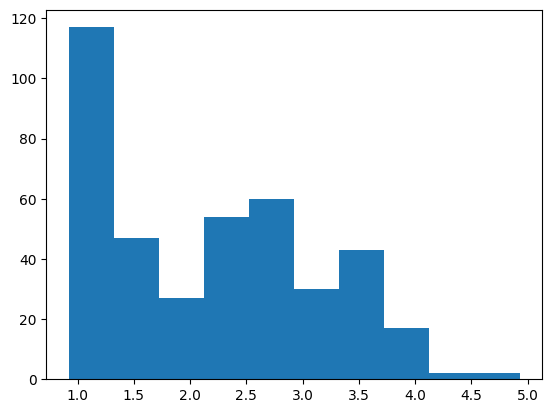

In [14]:
#Plotting values to overview outliers and strange values
plt.hist(gas_price_monthly['gas_price'])
plt.show()

        Date  gas_price
353  2020-01    2.54775
354  2020-02    2.44200
355  2020-03    2.23420
356  2020-04    1.84050
357  2020-05    1.86950


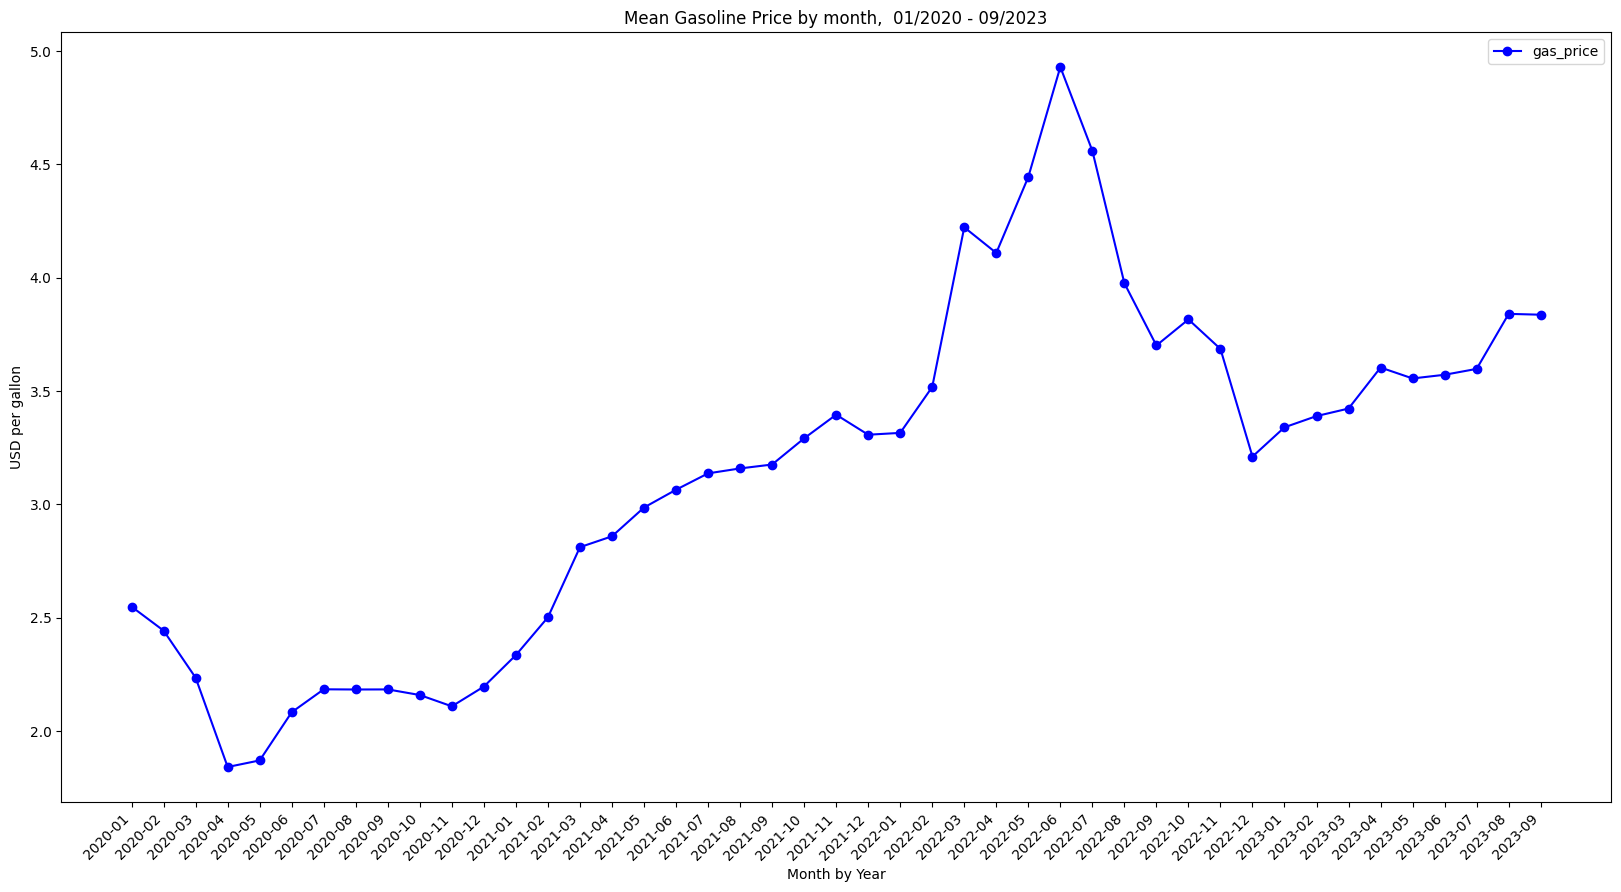

In [15]:
#Selecting data matching COVID-19 dates till 2023 - 09
gas_price_monthly = gas_price_monthly[(gas_price_monthly['Date'] >= '2020-01') & (gas_price_monthly['Date'] < '2023-10')]
print(gas_price_monthly.head())
#Plotting 
ax = gas_price_monthly.plot(x='Date', y='gas_price', marker='o', xlabel='Month by Year', ylabel='USD per gallon', color='blue', 
                               title='Mean Gasoline Price by month,  01/2020 - 09/2023')
plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(gas_price_monthly['Date'])))
ax.set_xticklabels(gas_price_monthly['Date'], rotation=45, ha='right')
plt.savefig('Mean Gasoline Price by month.png')
plt.show()

## COVID - 19 New Cases

##### Source: Variable time span	Jan 8, 2020 – Sep 27, 2023 Data published by WHO COVID-19 Dashboard. Geneva: World Health Organization, 2020. Available online: https://covid19.who.int/WHO-COVID-19-global-data.csv


### Exploratory Data Analysis

In [16]:
covid_cases = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\WHO-COVID-19-global-data.csv')

covid_cases.head(15)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [17]:
covid_cases.shape


(323268, 8)

In [18]:
covid_cases.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.232680e+05,3.232680e+05,323268.000000,3.232680e+05
mean,2.384633e+03,1.472605e+06,21.528008,1.805220e+04
std,3.920838e+04,6.720642e+06,149.018945,7.566745e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,0.000000e+00,2.411000e+03,0.000000,1.800000e+01
50%,0.000000e+00,3.595300e+04,0.000000,3.940000e+02
75%,1.590000e+02,4.154055e+05,2.000000,5.740000e+03
max,6.966046e+06,1.034368e+08,11447.000000,1.127152e+06


In [19]:
covid_cases.rename(columns={'Date_reported': 'Date', 'New_cases' : 'covid_new_cases'}, inplace=True)
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
covid_cases_m = covid_cases.resample('M', on='Date')['covid_new_cases'].sum()
covid_cases_m = covid_cases_m.reset_index()
covid_cases_m['covid_new_cases'] = pd.to_numeric(covid_cases_m['covid_new_cases'])
covid_cases_m['Date'] = covid_cases_m['Date'].dt.strftime('%Y-%m')

covid_cases_m.head()

,Date,covid_new_cases
0,2020-01,9843
1,2020-02,75364
2,2020-03,697575
3,2020-04,2222860
4,2020-05,2886396


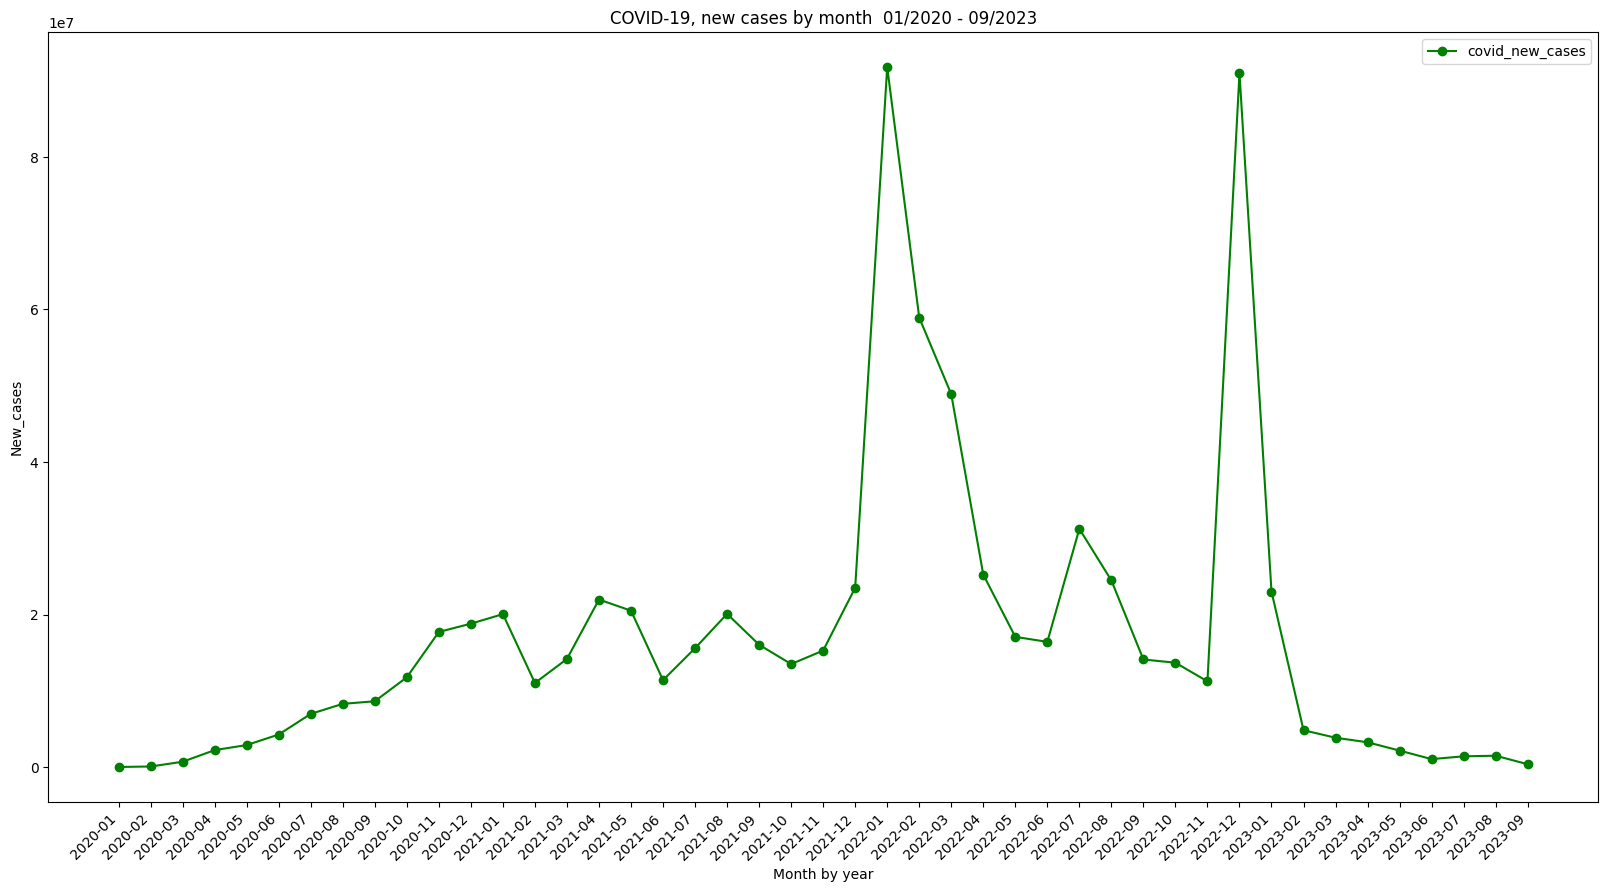

In [20]:
ax = covid_cases_m.plot(kind='line', x='Date', y='covid_new_cases', xlabel='Month by year',  marker='o', ylabel='New_cases', color='green',
                      title='COVID-19, new cases by month  01/2020 - 09/2023')

plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(covid_cases_m['Date'])))
ax.set_xticklabels(covid_cases_m['Date'], rotation=45, ha='right')
plt.show()

### Correlation Analysis: Investigating potential relationships between Ethereum's price and other variables or external factors.

#### Computing correlation coefficient for Ethereum Volume with COVID new cases

In [21]:
# Merging Ethereum Volume and Covid New Cases into merged_data DF
merged_data = e_volume_monthly.merge(covid_cases_m, on = 'Date')
merged_data.head()

,Date,e_volume,covid_new_cases
0,2020-01,327976431869,9843
1,2020-02,578092481246,75364
2,2020-03,498921414458,697575
3,2020-04,532158870567,2222860
4,2020-05,505593287696,2886396


<Axes: xlabel='e_volume', ylabel='covid_new_cases'>

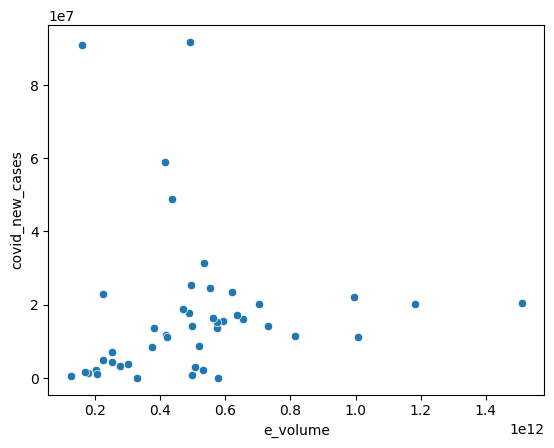

In [22]:
sns.scatterplot(x='e_volume', y='covid_new_cases', data=merged_data)

#### Computing correlation coefficient for Ethereum Open Monthly Differencess with COVID sum new cases

In [23]:
# Merging Ethereum Monthly Diff to merged_data DF
merged_data = merged_data.merge(ethereum_monthly_diff, on ='Date')
merged_data.head()

,Date,e_volume,covid_new_cases,e_month_diff
0,2020-01,327976431869,9843,16.536064
1,2020-02,578092481246,75364,82.057116
2,2020-03,498921414458,697575,-74.142160
3,2020-04,532158870567,2222860,6.253120
4,2020-05,505593287696,2886396,37.858542


<Axes: xlabel='e_month_diff', ylabel='covid_new_cases'>

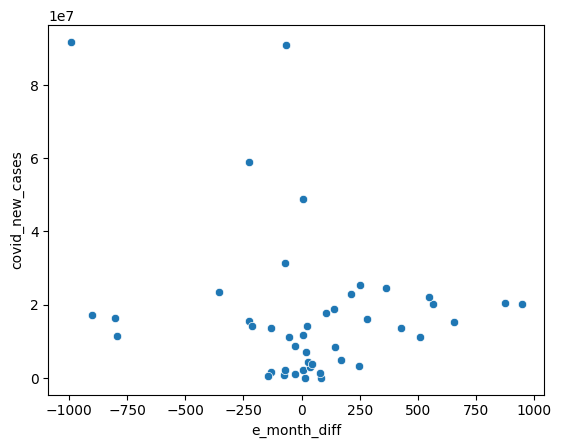

In [24]:
sns.scatterplot(x='e_month_diff', y='covid_new_cases', data=merged_data)

In [25]:
correlation_coefficient = merged_data['e_month_diff'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")



Correlation Coefficient: -0.22221807307820823
Correlation Level: weak correlation


#### Computing correlation coefficient for Ethereum Open with COVID new cases

In [26]:
# Merging Ethereum Open Monthly to merged_data DF
merged_data = merged_data.merge(e_open_monthly, on='Date')
merged_data.head()

,Date,e_volume,covid_new_cases,e_month_diff,e_open
0,2020-01,327976431869,9843,16.536064,155.320137
1,2020-02,578092481246,75364,82.057116,237.377253
2,2020-03,498921414458,697575,-74.142160,163.235093
3,2020-04,532158870567,2222860,6.253120,169.488213
4,2020-05,505593287696,2886396,37.858542,207.346755


<Axes: xlabel='e_open', ylabel='covid_new_cases'>

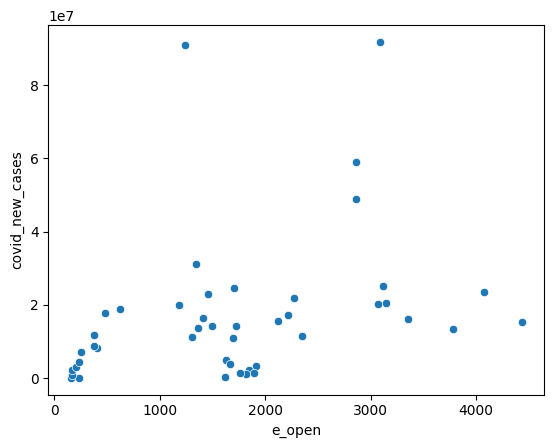

In [27]:
sns.scatterplot(x='e_open', y='covid_new_cases', data=merged_data)

In [28]:
correlation_coefficient = merged_data['e_open'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")


Correlation Coefficient: 0.34160979564709076
Correlation Level: moderate correlation


### Computing correlation coefficient for Ethereum Open Mean Price with Gasoline Price

In [29]:
# Merging Gas Price Monthly to merged_data DF
merged_data = merged_data.merge(gas_price_monthly, on = 'Date')
merged_data.head()

,Date,e_volume,covid_new_cases,e_month_diff,e_open,gas_price
0,2020-01,327976431869,9843,16.536064,155.320137,2.54775
1,2020-02,578092481246,75364,82.057116,237.377253,2.44200
2,2020-03,498921414458,697575,-74.142160,163.235093,2.23420
3,2020-04,532158870567,2222860,6.253120,169.488213,1.84050
4,2020-05,505593287696,2886396,37.858542,207.346755,1.86950


<Axes: xlabel='e_open', ylabel='gas_price'>

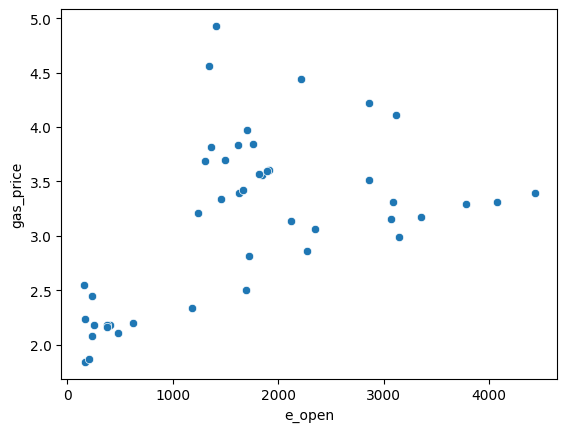

In [30]:
sns.scatterplot(x='e_open', y='gas_price', data=merged_data)

In [31]:
correlation_coefficient = merged_data['e_open'].corr(merged_data['gas_price'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.5278085330519298
Correlation Level: moderate correlation


### Computing correlation coefficient for Ethereum Volume with Ethereum Open Price

<Axes: xlabel='e_volume', ylabel='e_open'>

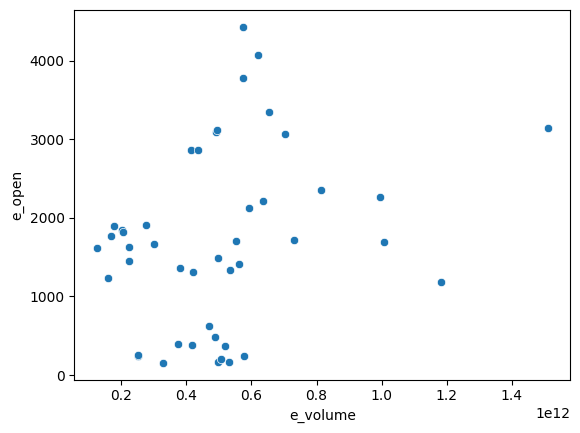

In [32]:
sns.scatterplot(x='e_volume', y='e_open', data=merged_data)

In [33]:
correlation_coefficient = merged_data['e_volume'].corr(merged_data['e_open'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.2834797209404926
Correlation Level: weak correlation


### Computing correlation coefficient for Ethereum Volume with Ethereum Monthly Open Price Differences

<Axes: xlabel='e_volume', ylabel='e_month_diff'>

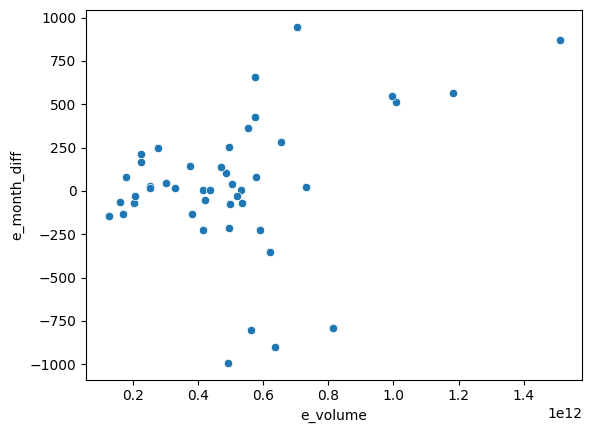

In [34]:
sns.scatterplot(x='e_volume', y='e_month_diff', data=merged_data)

In [35]:
correlation_coefficient = merged_data['e_volume'].corr(merged_data['e_month_diff'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.3330820615139074
Correlation Level: moderate correlation


#### Comparing Ethereum Mean Open Price Over Different Years (Overlap)

In [36]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

merged_data['quarter'] = merged_data['Date'].dt.to_period('Q')

merged_data['Month'] = merged_data['Date'].dt.month


merged_data

,Date,e_volume,covid_new_cases,e_month_diff,e_open,gas_price,quarter,Month
0,2020-01-01,327976431869,9843,16.536064,155.320137,2.54775,2020Q1,1
1,2020-02-01,578092481246,75364,82.057116,237.377253,2.44200,2020Q1,2
2,2020-03-01,498921414458,697575,-74.142160,163.235093,2.23420,2020Q1,3
3,2020-04-01,532158870567,2222860,6.253120,169.488213,1.84050,2020Q2,4
4,2020-05-01,505593287696,2886396,37.858542,207.346755,1.86950,2020Q2,5
5,2020-06-01,252220724156,4268401,28.921647,236.268403,2.08220,2020Q2,6
6,2020-07-01,251431946993,6973971,19.286091,255.554494,2.18325,2020Q3,7
7,2020-08-01,374122796720,8287922,143.771653,399.326147,2.18240,2020Q3,8
8,2020-09-01,518354378929,8625997,-28.442949,370.883198,2.18275,2020Q3,9
9,2020-10-01,416749195873,11771220,4.479377,375.362575,2.15800,2020Q4,10


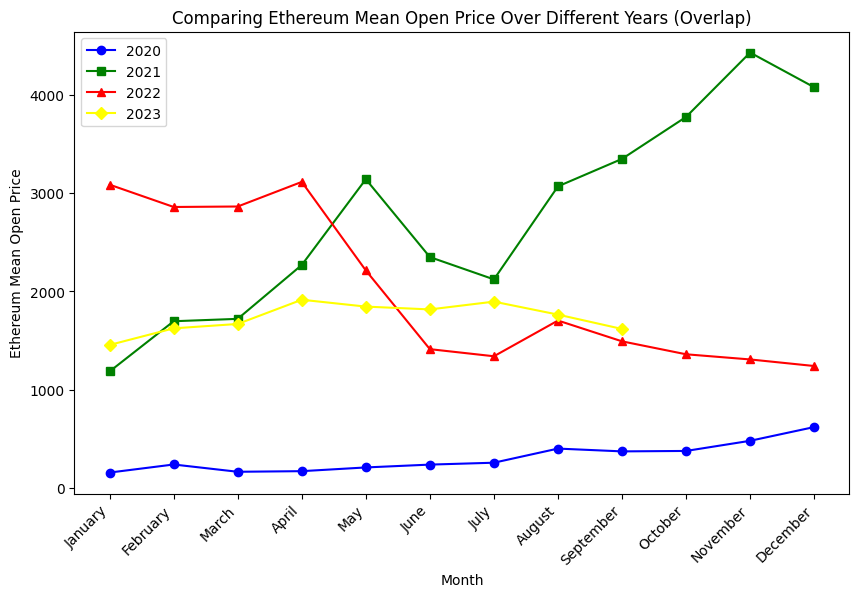

In [37]:
# Filter data for different date ranges
data_2020 = merged_data[merged_data['Date'] < '2021-01-01']
data_2021 = merged_data[(merged_data['Date'] >= '2021-01-01') & (merged_data['Date'] < '2022-01-01')]
data_2022 = merged_data[(merged_data['Date'] >= '2022-01-01') & (merged_data['Date'] < '2023-01-01')]
data_2023 = merged_data[(merged_data['Date'] >= '2023-01-01')]

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plot data for different date ranges with overlap
plt.plot(data_2020['Month'], data_2020['e_open'], label='2020', marker='o', color='blue')
plt.plot(data_2021['Month'], data_2021['e_open'], label='2021', marker='s', color='green')
plt.plot(data_2022['Month'], data_2022['e_open'], label='2022', marker='^', color='red')
plt.plot(data_2023['Month'], data_2023['e_open'], label='2023', marker='D', color='yellow')

# Customize the plot (titles, labels, legend, etc.)
import calendar
month_numbers = data_2020['Month']
month_names = [calendar.month_name[month_number] for month_number in month_numbers]

plt.title('Comparing Ethereum Mean Open Price Over Different Years (Overlap)')
plt.xticks(month_numbers, month_names, rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Ethereum Mean Open Price')
plt.legend()


# Show the plot
plt.show()



### Comparing Ethereum Q1 - Q4 Trading Volume Sum "2020-2022"

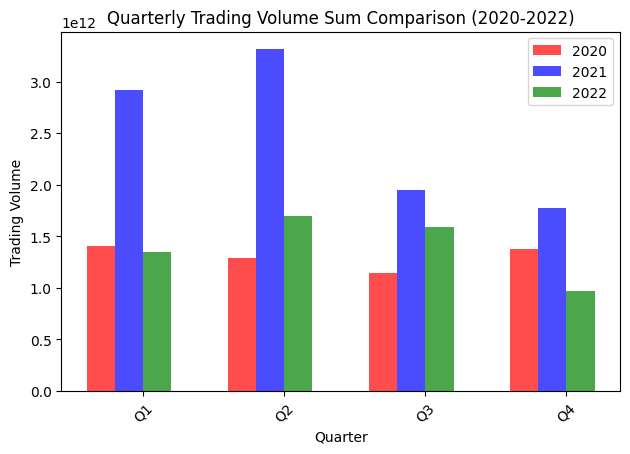

In [38]:
merged_data['quarter'] = merged_data['Date'].dt.to_period('Q')

data_2020_q = data_2020.groupby('quarter')['e_volume'].sum()
data_2021_q = data_2021.groupby('quarter')['e_volume'].sum()
data_2022_q = data_2022.groupby('quarter')['e_volume'].sum()
data_2023_q = data_2023.groupby('quarter')['e_volume'].sum()

colors = ['red', 'blue', 'green', 'yellow']

# Convert PeriodIndex to string for x-axis labels
x_labels = [str(period) for period in data_2020_q.index]

# Set the positions of bars on x-axis for each quarter
x = np.arange(len(x_labels))

# Set the width of each bar
bar_width = 0.2

# Create subplots
fig, ax = plt.subplots()

# Plot grouped bars for each year
ax.bar(x - 1.5*bar_width, data_2020_q.values, bar_width, label='2020', color=colors[0], alpha=0.7)
ax.bar(x - 0.5*bar_width, data_2021_q.values, bar_width, label='2021', color=colors[1], alpha=0.7)
ax.bar(x + 0.5*bar_width, data_2022_q.values, bar_width, label='2022', color=colors[2], alpha=0.7)


# Customize the plot
ax.set_xlabel('Quarter')
ax.set_ylabel('Trading Volume')
ax.set_title('Quarterly Trading Volume Sum Comparison (2020-2022)')

# Set custom x-tick positions and labels
custom_xticks = np.arange(len(x_labels))
custom_xticklabels = ['Q1', 'Q2', 'Q3', 'Q4']
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)

ax.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Comparing Ethereum Q1 - Q3 Trading Volume Sum "2020-2023"

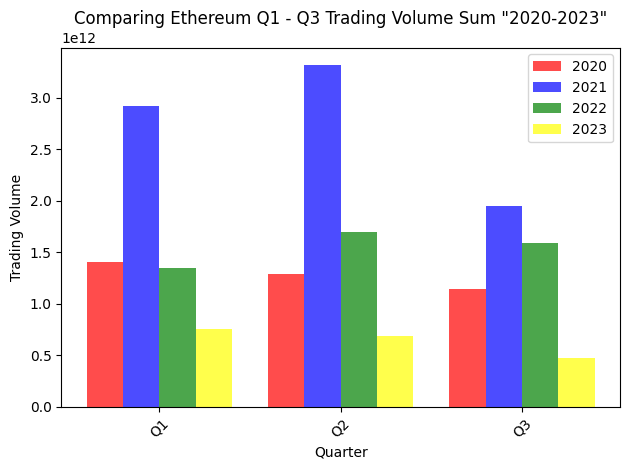

In [39]:
# Convert PeriodIndex to string for x-axis labels, including only Q1 to Q3
x_labels = [str(period) for period in data_2020_q.index if period.quarter <= 3]

# Set the positions of bars on x-axis for each quarter (including only Q1 to Q3)
x = np.arange(len(x_labels))

# Set the width of each bar
bar_width = 0.2

# Create subplots
fig, ax = plt.subplots()

# Plot grouped bars for each year, including only Q1 to Q3
ax.bar(x - 1.5*bar_width, data_2020_q.values[:3], bar_width, label='2020', color=colors[0], alpha=0.7)
ax.bar(x - 0.5*bar_width, data_2021_q.values[:3], bar_width, label='2021', color=colors[1], alpha=0.7)
ax.bar(x + 0.5*bar_width, data_2022_q.values[:3], bar_width, label='2022', color=colors[2], alpha=0.7)
ax.bar(x + 1.5*bar_width, data_2023_q.values[:3], bar_width, label='2023', color=colors[3], alpha=0.7)

# Customize the plot
ax.set_xlabel('Quarter')
ax.set_ylabel('Trading Volume')
ax.set_title('Comparing Ethereum Q1 - Q3 Trading Volume Sum "2020-2023"')

# Set custom x-tick positions and labels for Q1 to Q3
custom_xticks = np.arange(len(x_labels))
custom_xticklabels = ['Q1', 'Q2', 'Q3']
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)

ax.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
